In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from scipy.integrate import odeint


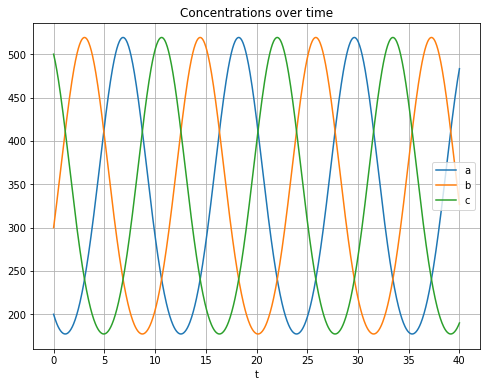

In [2]:
#Problem 1.1.4
#Solve the oscillator CRN ODE using the scipy.integrate.odeint function
#Plot the solution curves to the ODE in time interval 0 to 40

k1 = 0.001
k2 = 0.001
k3 = 0.001

def derivative(y, t):
    a=y[0]
    b=y[1]
    c=y[2]
    A = np.array([[1,-1,0],[-1,0,1],[0,1,-1]])
    Kc = np.array([k1*a*b, k2*a*c, k3*b*c])
    dydt = np.matmul(A, Kc)
    return dydt
    
t0 = 0
t_max = 40

a0 = 200
b0 = 300
c0 = 500

t_space = np.linspace(t0, t_max, 1001)

y0 = np.array([a0, b0, c0])

# Call the scipy.integrate.odeint function to solve the ODE
sol = scipy.integrate.odeint(derivative, y0, t_space)

fig = plt.figure(figsize=(8, 6))

# Plot the solution curves to the ODE
plt.plot(t_space, sol[:, 0], label='a')
plt.plot(t_space, sol[:, 1], label='b')
plt.plot(t_space, sol[:, 2], label='c')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Concentrations over time')
plt.grid()
plt.show()


In [3]:
#Problem 1.2.1-1.2.2
#Implement the Gillespie SSA (Direct Method)

#Gillespie SSA function
#Takes as input a list of initial molecule counts, a start and stop time, the stoichiometry matrix,
#a function that compute the propensity (kinetics) vector, and the rate constants.
#Returns lists of the simulated time points and molecule counts at each given time point.
def run_gillespie(init_count, t0, t_max, stoich, prop_func, ks) :
    n_molecules = np.array(init_count[:], dtype=np.float)
    reaction_ixs = np.arange(prop_func(init_count, ks).shape[0], dtype=np.int)
    t_histo = []
    n_molecule_histo = []
    
    # Implement the Gillespie algorithm, which should populate the two lists
    #      with time points and molecule counts respectively.
    t = t0
    x = init_count
    l = 0
    while(t < t_max and np.sum(prop_func(x, ks)) > 0):
        t_histo.append(t)
        n_molecule_histo.append(x)
        #step 1a, advance t
        t = t + np.log(1/np.random.random_sample())/np.sum(prop_func(x, ks))
        #step 1b, pick mu
        r = np.random.random_sample() * np.sum(prop_func(x, ks))
        mu = 0
        for v in reaction_ixs:
            av1 = np.sum(prop_func(x, ks)[:v])
            av2 = np.sum(prop_func(x, ks)[:v + 1])
            if(av1 < r and r <= av2):
                mu = v
                break;
        # step 2, update counts for new t given mu
        x = x + stoich[mu]
    
    return t_histo, n_molecule_histo


In [4]:
#Problem 1.2.1
#Run 10 iterations of the Gillespie SSA on the oscillator system

# Initialize the stoichiometry matrix as a numpy array.
stoich = np.array([[1,-1,0],[-1,0,1],[0,1,-1]])

def get_propensities(x, ks) :
    return np.array([x[0]*x[1]*ks[0], x[0]*x[2]*ks[1], x[1]*x[2]*ks[2]])

n_iters = 10

t_histos = []
n_molecule_histos = []

k1 = 0.001
k2 = 0.001
k3 = 0.001

t0 = 0
t_max = 40

a = 200
b = 300
c = 500

init_count = [a, b, c]
ks = [k1, k2, k3]

for n_iter in range(0, n_iters) :
    print('Iteration ' + str(n_iter))
    
    t_histo, n_molecule_histo = run_gillespie(init_count, t0, t_max, stoich, get_propensities, ks)
    
    t_histos.append(t_histo)
    n_molecule_histos.append(n_molecule_histo)


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


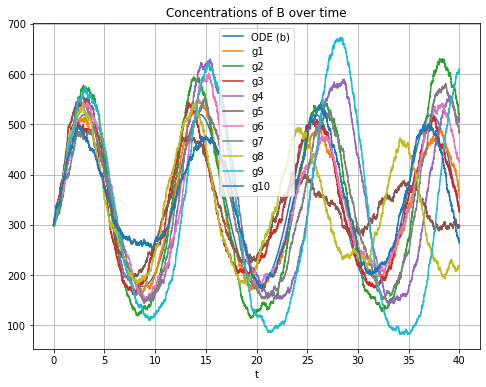

In [6]:
#Problem 1.2.1
#Plot the ODE solution and 10 Gillespie trajectories of species B

fig = plt.figure(figsize=(8, 6))
plt.plot(t_space, sol[:, 1], label='ODE (b)')
for i in range(len(t_histos)) :
    label = 'g' + str(i + 1)
    plt.plot(t_histos[i], np.array(n_molecule_histos[i])[:,1], label=label)
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Concentrations of B over time')
plt.grid()
plt.show()

In [ ]:
#Problem 1.2.2
#Run 10 iterations of the Gillespie SSA on the oscillator system, with rescaled initial parameters

n_iters = 10

t_histos = []
n_molecule_histos = []

k1 = 0.001 * 0.05
k2 = 0.001 * 0.05
k3 = 0.001 * 0.05

t0 = 0
t_max = 40

a = 200 * 20
b = 300 * 20
c = 500 * 20

init_count = [a, b, c]
ks = [k1, k2, k3]

for n_iter in range(0, n_iters) :
    print('Iteration ' + str(n_iter))
    
    t_histo, n_molecule_histo = run_gillespie(init_count, t0, t_max, stoich, get_propensities, ks)
    
    t_histos.append(t_histo)
    n_molecule_histos.append(n_molecule_histo)


Iteration 0


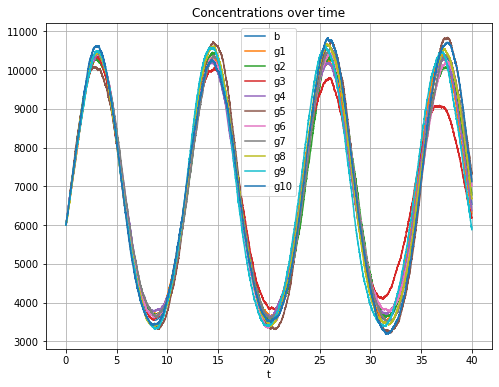

In [7]:
#Problem 1.2.2
#Plot the ODE solution and 10 Gillespie trajectories of species B
t_space = np.linspace(t0, t_max, 1001)

a0 = 200 * 20
b0 = 300 * 20
c0 = 500 * 20
y0 = np.array([a0, b0, c0])

k1 = 0.001 * 0.05
k2 = 0.001 * 0.05
k3 = 0.001 * 0.05

def derivative(y, t):
    a=y[0]
    b=y[1]
    c=y[2]
    A = np.array([[1,-1,0],[-1,0,1],[0,1,-1]])
    Kc = np.array([k1*a*b, k2*a*c, k3*b*c])
    dydt = np.matmul(A, Kc)
    return dydt
    
# Call the scipy.integrate.odeint function to solve the ODE
sol = scipy.integrate.odeint(derivative, y0, t_space)

fig = plt.figure(figsize=(8, 6))
plt.plot(t_space, sol[:, 1], label='b')
for i in range(len(t_histos)) :
    label = 'g' + str(i + 1)
    plt.plot(t_histos[i], np.array(n_molecule_histos[i])[:,1], label=label)
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Concentrations over time')
plt.grid()
plt.show()

### Why does the simulation take much longer time compared to problem 1.2.1?
The Monte Carlo step of Gillespie's algorithm generates much smaller time intervals when a reaction is more likely to occur. With a higher number of interactions being more likely, the average time interval for which a reaction is expected to occur decreases significantly.

Specifically, this is because a0 increases, which inversely affects t = (1/a0)ln(1/r1)

### Why do the trajectories seem less noisy compared to problem 1.2.1?
As explained in part 1.2.1, we are taking many more samples at shorter time intervals, which creates smoother sampling because there is less random chance that the stochastic algorithm strays from the determinative solution. With more samples, the influence of randomness on the chemical interactions decreases.